In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from geopandas import GeoDataFrame
from shapely.geometry import Point
from contextily import add_basemap

In [5]:
df = pd.read_csv('Taxi_Trips.csv',usecols=['Trip Start Timestamp','Pickup Community Area' ,'Dropoff Community Area','Pickup Centroid Latitude','Pickup Centroid Longitude','Dropoff Centroid Latitude','Dropoff Centroid Longitude'])


In [6]:
df.dropna(subset=['Trip Start Timestamp','Pickup Community Area', 'Dropoff Community Area'],
          axis=0, # axis=0表示删除行；
          how='any', # how=any表示任意一个出现空值，就删掉该行
          inplace=True # inplace=True表示在原df上进行修改；
          )

In [10]:
df = df.rename(columns ={'Pickup Community Area':'O_Area','Dropoff Community Area':'D_Area','Pickup Centroid Latitude':'start_lat','Pickup Centroid Longitude':'start_lng','Dropoff Centroid Latitude':'end_lat','Dropoff Centroid Longitude':'end_lng'})
df.head()

,Trip Start Timestamp,O_Area,D_Area,start_lat,start_lng,end_lat,end_lng
16,01/01/2019 12:00:00 AM,8.0,32.0,41.891972,-87.612945,41.880994,-87.632746
18,01/01/2019 12:00:00 AM,77.0,28.0,41.986712,-87.663416,41.874005,-87.663518
19,01/01/2019 12:00:00 AM,32.0,32.0,41.880994,-87.632746,41.877406,-87.621972
20,01/01/2019 12:00:00 AM,8.0,8.0,41.898332,-87.620763,41.892508,-87.626215
22,01/01/2019 12:00:00 AM,8.0,8.0,41.890922,-87.618868,41.892042,-87.631864


[]

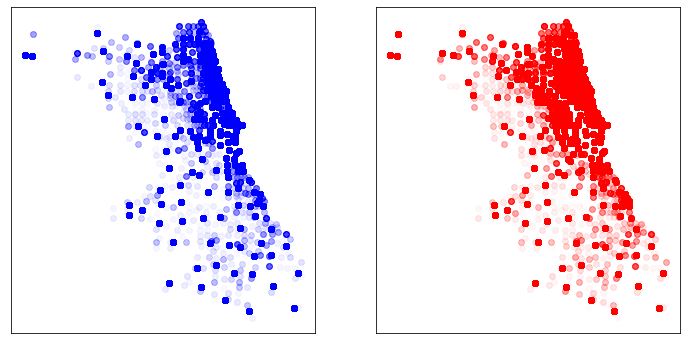

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].scatter(df.start_lng, df.start_lat, c='b',label="Origin" ,alpha=0.01);
ax[1].scatter(df.end_lng, df.end_lat, c='r',label="Destination", alpha=0.01);
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])

In [22]:
from shapely.geometry import Polygon
import geopandas as gpd
import descartes
%matplotlib inline

<AxesSubplot:>

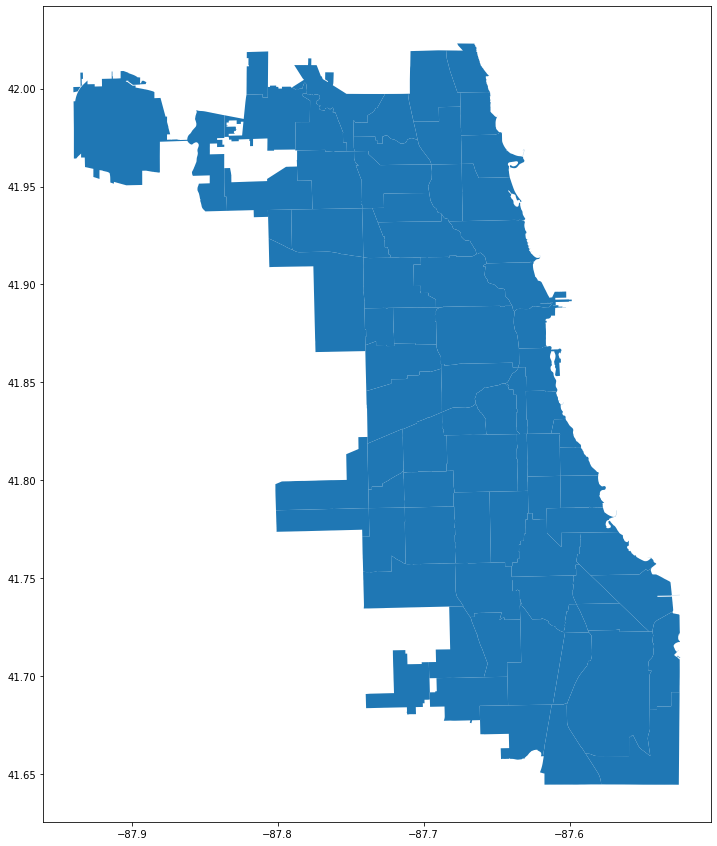

In [19]:
chicago_area = gpd.read_file('geo_export_4c471519-04c7-42ca-bbd4-6e12d8766916.shp')
fig,ax=plt.subplots(figsize = (15,15))
chicago_area.plot(ax=ax)

In [20]:
geometry = [Point(xy) for xy in zip(df.start_lng, df.start_lat)]
geometry[:3]

In [25]:
crs = {'init':'epsg:4326'}

In [26]:
geo_df = gpd.GeoDataFrame(df,
                         crs=crs,
                         geometry = geometry)
geo_df.head()

C:\ProgramData\Anaconda3\envs\SLDA\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Trip Start Timestamp,O_Area,D_Area,start_lat,start_lng,end_lat,end_lng,geometry
16,01/01/2019 12:00:00 AM,8.0,32.0,41.891972,-87.612945,41.880994,-87.632746,POINT (-87.61295 41.89197)
18,01/01/2019 12:00:00 AM,77.0,28.0,41.986712,-87.663416,41.874005,-87.663518,POINT (-87.66342 41.98671)
19,01/01/2019 12:00:00 AM,32.0,32.0,41.880994,-87.632746,41.877406,-87.621972,POINT (-87.63275 41.88099)
20,01/01/2019 12:00:00 AM,8.0,8.0,41.898332,-87.620763,41.892508,-87.626215,POINT (-87.62076 41.89833)
22,01/01/2019 12:00:00 AM,8.0,8.0,41.890922,-87.618868,41.892042,-87.631864,POINT (-87.61887 41.89092)


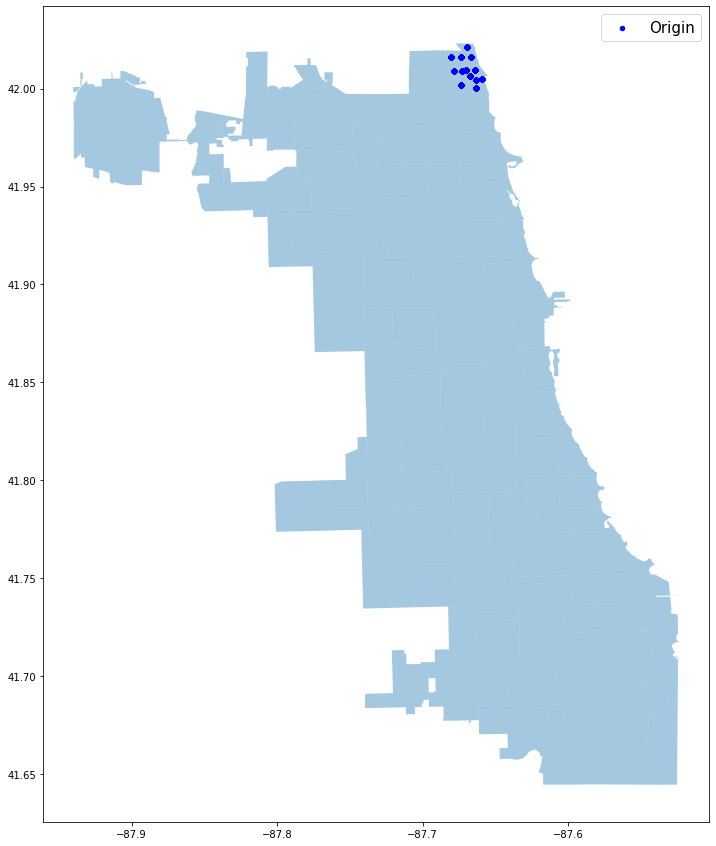

In [28]:
fig,ax=plt.subplots(figsize = (15,15))
chicago_area.plot(ax=ax, alpha = 0.4)
geo_df[geo_df['O_Area']==1].plot(ax = ax ,markersize = 20, color ='blue', marker = 'o', label='Origin')
#geo_df[geo_df['D_Area']==1].plot(ax = ax ,markersize = 20, color ='red', marker = '^', label='Destination')
plt.legend(prop={'size':15})

In [32]:
cen_start =geo_df['geometry'].centroid


C:\Users\Huang\AppData\Local\Temp\ipykernel_16972\3698159124.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cen_start =geo_df['geometry'].centroid
Exception ignored in: <function BaseGeometry.__del__ at 0x0000023FC1C64160>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\envs\SLDA\lib\site-packages\shapely\geometry\base.py", line 209, in __del__
    self._empty(val=None)
  File "C:\ProgramData\Anaconda3\envs\SLDA\lib\site-packages\shapely\geometry\base.py", line 194, in _empty
    self._lgeos.GEOSGeom_destroy(self.__geom__)
KeyboardInterrupt: 


KeyboardInterrupt: 

In [39]:
data = pd.read_csv('Taxi_Trips.csv',usecols=['Trip Start Timestamp','Pickup Community Area' ,'Dropoff Community Area','Pickup Centroid Location','Dropoff Centroid  Location'])
data.dropna(subset=['Trip Start Timestamp','Pickup Community Area' ,'Dropoff Community Area','Pickup Centroid Location','Dropoff Centroid  Location'],
          axis=0, # axis=0表示删除行；
          how='any', # how=any表示任意一个出现空值，就删掉该行
          inplace=True # inplace=True表示在原df上进行修改；
          )
data = data.rename(columns ={'Pickup Community Area':'O_Area','Dropoff Community Area':'D_Area','Pickup Centroid Location':'start_loc','Dropoff Centroid Location':'end_loc'})
data.head()

,Trip Start Timestamp,O_Area,D_Area,start_loc,Dropoff Centroid Location
16,01/01/2019 12:00:00 AM,8.0,32.0,POINT (-87.6129454143 41.8919715078),POINT (-87.6327464887 41.8809944707)
18,01/01/2019 12:00:00 AM,77.0,28.0,POINT (-87.6634164054 41.9867117999),POINT (-87.6635175498 41.874005383)
19,01/01/2019 12:00:00 AM,32.0,32.0,POINT (-87.6327464887 41.8809944707),POINT (-87.6219716519 41.8774061234)
20,01/01/2019 12:00:00 AM,8.0,8.0,POINT (-87.6207628651 41.8983317935),POINT (-87.6262149064 41.8925077809)
22,01/01/2019 12:00:00 AM,8.0,8.0,POINT (-87.6188683546 41.8909220259),POINT (-87.6318639497 41.8920421365)


In [42]:
df_origin=data[['O_Area','start_loc']]
df_destination=data[['D_Area','start_loc']]

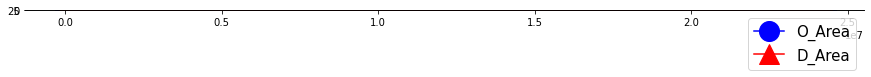

In [43]:
fig,ax=plt.subplots(figsize = (15,15))
chicago_area.plot(ax=ax, alpha = 0.4)
df_origin[df_origin['O_Area']==1].plot(ax = ax ,markersize = 20, color ='blue', marker = 'o', label='Origin')
df_destination[df_destination['D_Area']==1].plot(ax = ax ,markersize = 20, color ='red', marker = '^', label='Destination')

plt.legend(prop={'size':15})

In [45]:
type(data['start_loc'])

pandas.core.series.Series

In [46]:
type(geo_df['geometry'])

geopandas.geoseries.GeoSeries

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


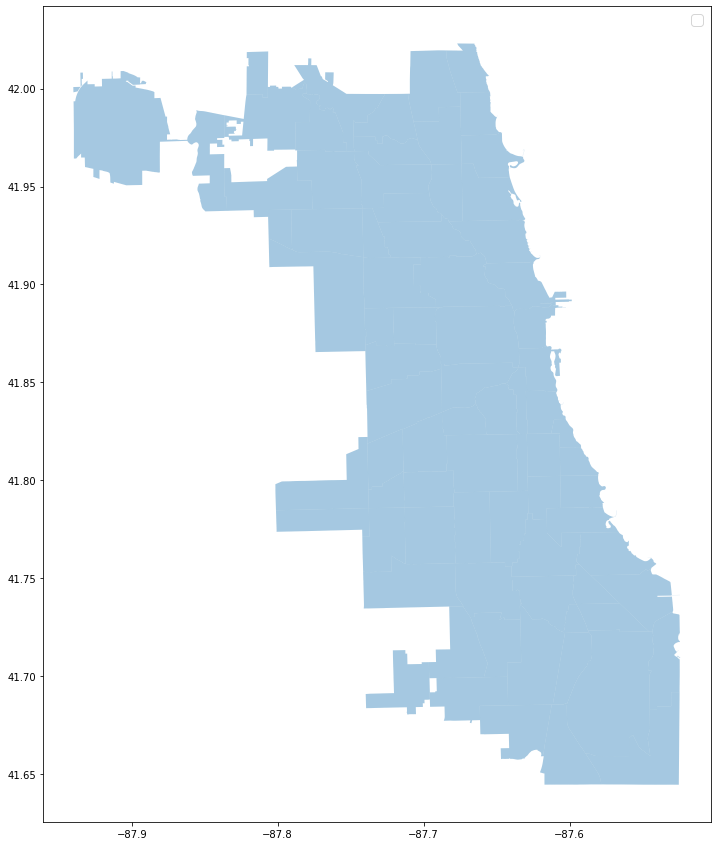

In [44]:
fig,ax=plt.subplots(figsize = (15,15))
chicago_area.plot(ax=ax, alpha = 0.4)

plt.legend(prop={'size':15})